# Analysis of Heart Disease Indicators

#### This dataset was retrieved from Kaggle (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
Below is a summary of the data

About Dataset
Key Indicators of Heart Disease

2020 annual CDC survey data of 400k adults related to their health status

What topic does the dataset cover?

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

---

### Reading the data

In [46]:
#Information about Pandas and the documentation can be found here - https://pandas.pydata.org/docs/
import pandas as pd

In [47]:
#Pandas has a great built-in function to read a CSV file and store it in a DataFrame
df = pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


---

### Analysis

Let's look at a simple analysis of this dataset. Say I want to look at the overall health of people who smoke and drink alcohol.
For starters, I will store a temporary dataframe that just stores the information we need to make this analysis.
This step is unnecessary, but I am doing it in this way so that you can visualize just the data we are using for this one analysis.

In [48]:
temporary_frame = df[['Smoking', 'AlcoholDrinking', 'GenHealth']]
temporary_frame

,Smoking,AlcoholDrinking,GenHealth
0,Yes,No,Very good
1,No,No,Very good
2,Yes,No,Fair
3,No,No,Good
4,No,No,Very good
...,...,...,...
319790,Yes,No,Fair
319791,Yes,No,Very good
319792,No,No,Good
319793,No,No,Good


Next, I'll filter our data to only include features that contain a 'yes' for Smoking and Alcohol Drinking.

In [49]:
temporary_frame = temporary_frame[(temporary_frame.Smoking == "Yes") & (temporary_frame.AlcoholDrinking == "Yes")]
count_smoker_drinker = len(temporary_frame.index)
temporary_frame

,Smoking,AlcoholDrinking,GenHealth
176,Yes,Yes,Good
201,Yes,Yes,Very good
207,Yes,Yes,Very good
259,Yes,Yes,Very good
284,Yes,Yes,Good
...,...,...,...
319382,Yes,Yes,Good
319455,Yes,Yes,Excellent
319601,Yes,Yes,Fair
319625,Yes,Yes,Fair


Great! Now we have narrowed down our dataset to the columns we need in order to conduct this analysis.
Now that we know we've filtered our dataframe to only include people who reported that they smoke and drink,
let's get a count of all the GenHealth values in our dataset using value_counts().

In [50]:
#value_counts() returns back a dataframe with the counts of all unique values in a series (in descending order by default).
counts = temporary_frame.GenHealth.value_counts()
counts

Very good    4868
Good         4162
Excellent    2497
Fair         1451
Poor          437
Name: GenHealth, dtype: int64

Using our new 'counts' dataframe, lets visualize the breakdown of the data in a pie chart using the pie function (which utilizes matplotlib.pyplot).

Total number of people who reported that they smoke and drink: 13415


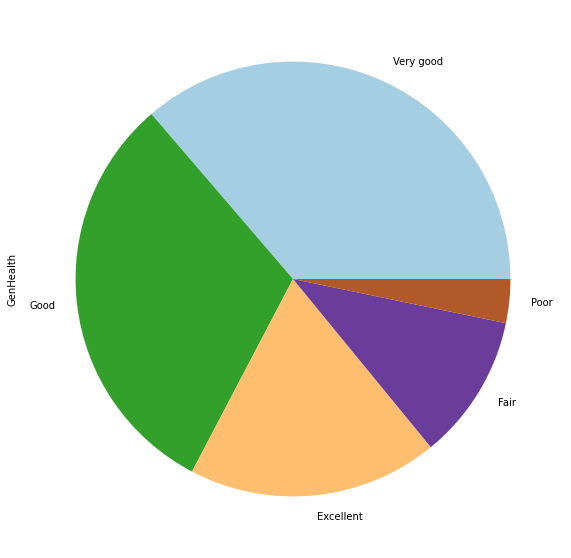

In [51]:
plot = counts.plot.pie(figsize=(10, 10), colormap='Paired')
print(f"Total number of people who reported that they smoke and drink: {count_smoker_drinker}")

Another way we could visualize our data is with a bar graph

<AxesSubplot:>

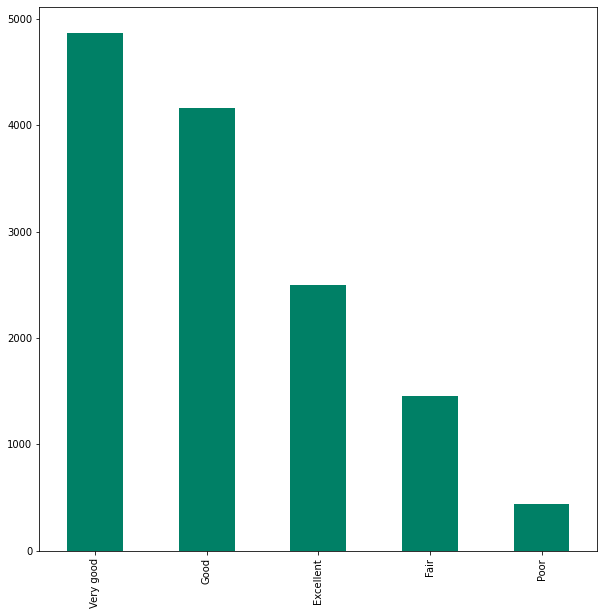

In [52]:
counts.plot.bar(figsize=(10, 10), colormap='summer')

Visualizing data is a key part of data science and machine learning. There are many Python modules that exist for visualization, but the
functionality shared amongst data and matplotlib.pyplot is incredible useful and relatively commonplace in the field.

### Summary

As you can see, this was a very generic and straight-forward analysis. Though, I hope that you walked away with some basic understanding of a few key topics:
    - Importing csv files and storing them as a DataFrame using Pandas
    - Filtering the data to meet the need
    - Utilizing built-in plotting functions that use matplotlib.pyplot
I will be adding more Jupyter notebooks to this directory in due time. If you have any feedback, let me know!